In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
df.shape  

(8494, 24)

In [4]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_num', 'Cabin_port', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'Name',
       'Transported'],
      dtype='object')

#### scaler

In [32]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)


In [5]:
# df.info()
df.drop(['PassengerId','Transported','Name'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   float64
 1   CryoSleep     8494 non-null   float64
 2   Cabin_A       8494 non-null   float64
 3   Cabin_B       8494 non-null   float64
 4   Cabin_C       8494 non-null   float64
 5   Cabin_D       8494 non-null   float64
 6   Cabin_E       8494 non-null   float64
 7   Cabin_F       8494 non-null   float64
 8   Cabin_G       8494 non-null   float64
 9   Cabin_T       8494 non-null   float64
 10  Cabin_num     8494 non-null   float64
 11  Cabin_port    8494 non-null   float64
 12  Destination   8494 non-null   float64
 13  Age           8494 non-null   float64
 14  VIP           8494 non-null   float64
 15  RoomService   8494 non-null   float64
 16  FoodCourt     8494 non-null   float64
 17  ShoppingMall  8494 non-null   float64
 18  Spa           8494 non-null 

<br/>
<br/>
<br/>

# train_update원본 - MinMaxScaler

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results


In [8]:
#!pip install lightgbm

In [9]:
#conda install -c conda-forge scikit-plot

Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
[LightGBM] [Warning] Unknown parameter: min_cat_group
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5, 0.64, 0.8],
                         'feature_fraction': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_cat_group': array([50, 60, 70, 80, 90]),
                         'min_data_in_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'bagging_fraction': 0.5, 'feature_fraction': 0.5, 'max_depth': 8, 'min_cat_group': 50, 'min_data_in_leaf': 26, 'random_state': 42}
best_score_ :  0.8172185430463574


0.8034193956056138

confusion_matrix : 
 [[681 170]
 [164 684]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

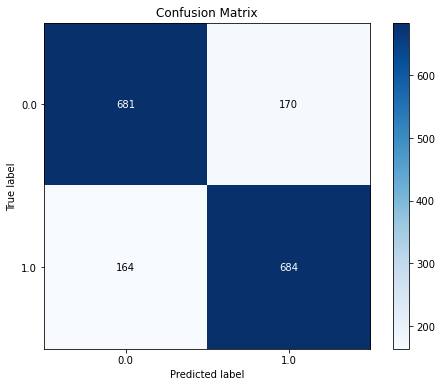

TypeError: booster must be dict or LGBMModel.

In [7]:
### 모델 lightgbm ###

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 

from MyModule import girdcvconv as gc

estimator = lgb.LGBMClassifier()
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())


min_data_in_leaf_list = np.arange(20,30)
max_depth_list =  np.arange(2, 20)
feature_fraction_list = np.arange(0.5, 1.0, 0.1)                                 
bagging_fraction_list =  [0.5, 0.64, 0.8]  
min_cat_group_list = np.arange(50, 100, 10)

parameter={
    'min_data_in_leaf' : min_data_in_leaf_list,
    'max_depth' : max_depth_list,
    'feature_fraction' : feature_fraction_list,    
    'bagging_fraction' : bagging_fraction_list,
    'min_cat_group' : min_cat_group_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train,y_train)


print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='train_update', scaler='MinMaxScaler', model_name='LGBMClassifier', best_params=model.best_params_, best_score=model.best_score_)


from sklearn.metrics import roc_auc_score
pred = model.predict(X_test)
roc_auc_score(y_test,pred)


cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()


lgb.plot_metric(model)

lgb.plot_importance(model)



<br/>
<br/>
<br/>

# train_update원본 - StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('StandardScaler')

StandardScaler Results


Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
[LightGBM] [Warning] Unknown parameter: min_cat_group
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5, 0.64, 0.8],
                         'feature_fraction': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_cat_group': array([50, 60, 70, 80, 90]),
                         'min_data_in_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'bagging_fraction': 0.5, 'feature_fraction': 0.5, 'max_depth': 10, 'min_cat_group': 50, 'min_data_in_leaf': 20, 'random_state': 42}
best_score_ :  0.8166298749080205


0.7975252477662239

C:\Users\shs03\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion_matrix : 
 [[680 171]
 [173 675]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

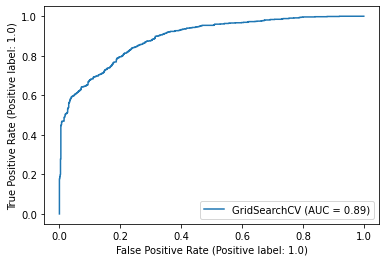

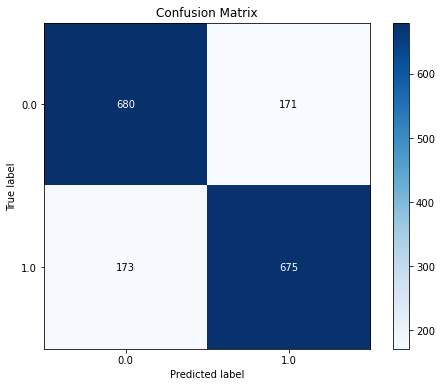

NotFittedError: No results found. Need to call fit with eval_set beforehand.

In [9]:
### 모델 lightgbm ###

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 

from MyModule import girdcvconv as gc

estimator = lgb.LGBMClassifier()
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())


min_data_in_leaf_list = np.arange(20,30)
max_depth_list =  np.arange(2, 20)
feature_fraction_list = np.arange(0.5, 1.0, 0.1)                                 
bagging_fraction_list =  [0.5, 0.64, 0.8]  
min_cat_group_list = np.arange(50, 100, 10)

parameter={
    'min_data_in_leaf' : min_data_in_leaf_list,
    'max_depth' : max_depth_list,
    'feature_fraction' : feature_fraction_list,    
    'bagging_fraction' : bagging_fraction_list,
    'min_cat_group' : min_cat_group_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train,y_train)


print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='train_update', scaler='StandardScaler', model_name='LGBMClassifier', best_params=model.best_params_, best_score=model.best_score_)


from sklearn.metrics import roc_auc_score
pred = model.predict(X_test)
roc_auc_score(y_test,pred)


from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)


cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()


<br/>
<br/>
<br/>



## train_update원본 - RobustScaler

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('RobustScaler')

RobustScaler Results


Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
[LightGBM] [Warning] Unknown parameter: min_cat_group
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5, 0.64, 0.8],
                         'feature_fraction': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_cat_group': array([50, 60, 70, 80, 90]),
                         'min_data_in_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'bagging_fraction': 0.5, 'feature_fraction': 0.5, 'max_depth': 7, 'min_cat_group': 50, 'min_data_in_leaf': 23, 'random_state': 42}
best_score_ :  0.8166298749080205


0.7981169489834379

C:\Users\shs03\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion_matrix : 
 [[679 172]
 [171 677]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

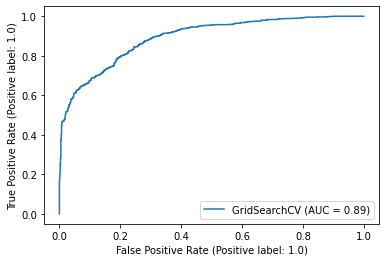

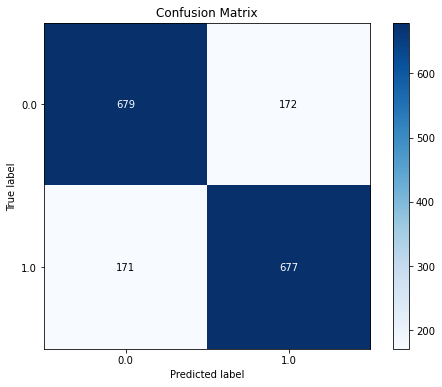

In [11]:
### 모델 lightgbm ###

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 

from MyModule import girdcvconv as gc

estimator = lgb.LGBMClassifier()
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())


min_data_in_leaf_list = np.arange(20,30)
max_depth_list =  np.arange(2, 20)
feature_fraction_list = np.arange(0.5, 1.0, 0.1)                                 
bagging_fraction_list =  [0.5, 0.64, 0.8]  
min_cat_group_list = np.arange(50, 100, 10)

parameter={
    'min_data_in_leaf' : min_data_in_leaf_list,
    'max_depth' : max_depth_list,
    'feature_fraction' : feature_fraction_list,    
    'bagging_fraction' : bagging_fraction_list,
    'min_cat_group' : min_cat_group_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train,y_train)


print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='train_update', scaler='RobustScaler', model_name='LGBMClassifier', best_params=model.best_params_, best_score=model.best_score_)


from sklearn.metrics import roc_auc_score
pred = model.predict(X_test)
roc_auc_score(y_test,pred)


from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)


cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()


<br/>
<br/>
<br/>

## VIP삭제하고 해보기 - MinMaxScaler

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name', 'VIP'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results


Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
[LightGBM] [Warning] Unknown parameter: min_cat_group
[LightGBM] [Warning] feature_fraction is set=0.8999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999999999999999
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5, 0.64, 0.8],
                         'feature_fraction': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_cat_group': array([50, 60, 70, 80, 90]),
                         'min_data_in_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'bagging_fraction': 0.5, 'feature_fraction': 0.8999999999999999, 'max_depth': 5, 'min_cat_group': 50, 'min_data_in_leaf': 20, 'random_state': 42}
best_score_ :  0.8153053715967623


0.8016588419839035

C:\Users\shs03\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion_matrix : 
 [[677 174]
 [163 685]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

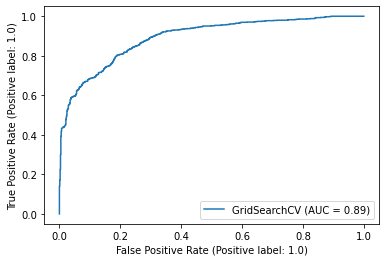

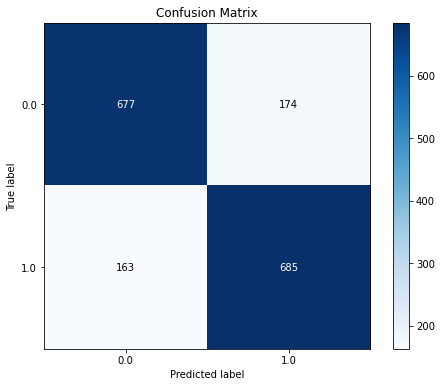

In [13]:
### 모델 lightgbm ###

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 

from MyModule import girdcvconv as gc

estimator = lgb.LGBMClassifier()
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())


min_data_in_leaf_list = np.arange(20,30)
max_depth_list =  np.arange(2, 20)
feature_fraction_list = np.arange(0.5, 1.0, 0.1)                                 
bagging_fraction_list =  [0.5, 0.64, 0.8]  
min_cat_group_list = np.arange(50, 100, 10)

parameter={
    'min_data_in_leaf' : min_data_in_leaf_list,
    'max_depth' : max_depth_list,
    'feature_fraction' : feature_fraction_list,    
    'bagging_fraction' : bagging_fraction_list,
    'min_cat_group' : min_cat_group_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train,y_train)


print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='train_update_VIPdel', scaler='MinMaxScaler', model_name='LGBMClassifier', best_params=model.best_params_, best_score=model.best_score_)


from sklearn.metrics import roc_auc_score
pred = model.predict(X_test)
roc_auc_score(y_test,pred)


from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)


cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()


<br/>
<br/>
<br/>

## VIP삭제하고 해보기 - StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name', 'VIP'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('StandardScaler')

StandardScaler Results


Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
[LightGBM] [Warning] Unknown parameter: min_cat_group
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5, 0.64, 0.8],
                         'feature_fraction': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_cat_group': array([50, 60, 70, 80, 90]),
                         'min_data_in_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'bagging_fraction': 0.5, 'feature_fraction': 0.6, 'max_depth': 8, 'min_cat_group': 50, 'min_data_in_leaf': 24, 'random_state': 42}
best_score_ :  0.8153053715967623


0.8010505121610536

C:\Users\shs03\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion_matrix : 
 [[686 165]
 [173 675]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

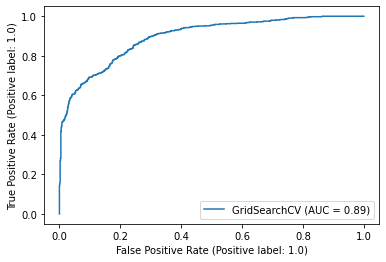

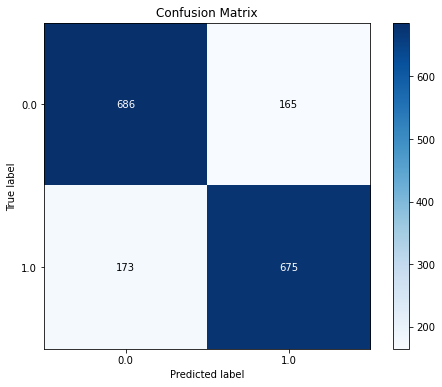

In [15]:
### 모델 lightgbm ###

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 

from MyModule import girdcvconv as gc

estimator = lgb.LGBMClassifier()
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())


min_data_in_leaf_list = np.arange(20,30)
max_depth_list =  np.arange(2, 20)
feature_fraction_list = np.arange(0.5, 1.0, 0.1)                                 
bagging_fraction_list =  [0.5, 0.64, 0.8]  
min_cat_group_list = np.arange(50, 100, 10)

parameter={
    'min_data_in_leaf' : min_data_in_leaf_list,
    'max_depth' : max_depth_list,
    'feature_fraction' : feature_fraction_list,    
    'bagging_fraction' : bagging_fraction_list,
    'min_cat_group' : min_cat_group_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train,y_train)


print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='train_update_VIPdel', scaler='StandardScaler', model_name='LGBMClassifier', best_params=model.best_params_, best_score=model.best_score_)


from sklearn.metrics import roc_auc_score
pred = model.predict(X_test)
roc_auc_score(y_test,pred)


from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)


cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name', 'VIP'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('RobustScaler')

RobustScaler Results


Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
[LightGBM] [Warning] Unknown parameter: min_cat_group
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5, 0.64, 0.8],
                         'feature_fraction': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_cat_group': array([50, 60, 70, 80, 90]),
                         'min_data_in_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'bagging_fraction': 0.5, 'feature_fraction': 0.7, 'max_depth': 15, 'min_cat_group': 50, 'min_data_in_leaf': 21, 'random_state': 42}
best_score_ :  0.815599705665931


0.7951813072301177

C:\Users\shs03\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion_matrix : 
 [[673 178]
 [170 678]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

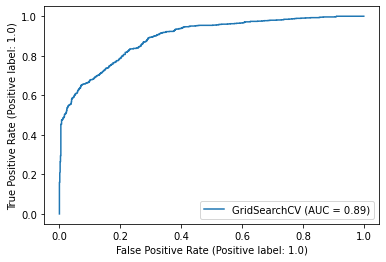

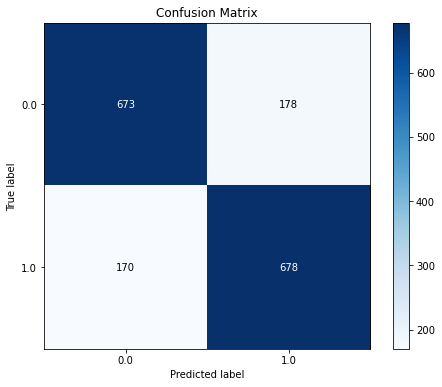

In [17]:
### 모델 lightgbm ###

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 

from MyModule import girdcvconv as gc

estimator = lgb.LGBMClassifier()
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())


min_data_in_leaf_list = np.arange(20,30)
max_depth_list =  np.arange(2, 20)
feature_fraction_list = np.arange(0.5, 1.0, 0.1)                                 
bagging_fraction_list =  [0.5, 0.64, 0.8]  
min_cat_group_list = np.arange(50, 100, 10)

parameter={
    'min_data_in_leaf' : min_data_in_leaf_list,
    'max_depth' : max_depth_list,
    'feature_fraction' : feature_fraction_list,    
    'bagging_fraction' : bagging_fraction_list,
    'min_cat_group' : min_cat_group_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
model.fit(X_train,y_train)


print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='train_update_VIPdel', scaler='RobustScaler', model_name='LGBMClassifier', best_params=model.best_params_, best_score=model.best_score_)


from sklearn.metrics import roc_auc_score
pred = model.predict(X_test)
roc_auc_score(y_test,pred)


from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)


cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()


#### 3-2 모델

In [7]:
## 예시
# from MyModule import girdcvconv as gc
# best_params =  {'criterion': 'gini', 'max_depth': 19, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
# best_score_ =  0.7113550153749467
# gc.paramsTocsv(data_name='obesity', scaler='StandardScaler', model_name='DecisionTreeClassifier', best_params=best_params, best_score=best_score_)

In [13]:
# 생성된 dataframe 확인
import pandas as pd
df = pd.read_csv('./modeldata/testdata.csv')
df

,date,model_name,scaler,best_score,criterion,max_depth,min_impurity_decrease,min_samples_split,min_weight_fraction_leaf,random_state,splitter
0,2022-12-06 14:44:34,DecisionTreeClassifier,StandardScaler,0.766323,gini,16,0.0,15,0.0,42,random


In [10]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

bestparams = sp.selectparam('obesity',0)
print(bestparams)

{'criterion': ['gini'], 'max_depth': [19], 'min_impurity_decrease': [0.0], 'min_samples_split': [2], 'min_weight_fraction_leaf': [0.0], 'random_state': [42], 'splitter': ['best']}


In [ ]:
#DecisionTreeClassifier 최적의 파라미터를 바로 삽입
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
df01 = df[df['CryoSleep'] == 0]

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df01.drop(['PassengerId','Transported','Name'],axis=1),df01['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results
